In [3]:
import sys, os
import itertools

import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio

import nibabel as nib
import nilearn
from nilearn import image
from nilearn import plotting
from nilearn import datasets

import seaborn as sns
%load_ext autoreload
%autoreload 2

/Users/siyuangao/miniconda3/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/siyuangao/miniconda3/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/siyuangao/miniconda3/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils

In [21]:
xilin_parc = '/Users/siyuangao/Working_Space/fmri/data/parcellation_and_network/shen_1mm_268_parcellation.nii'

In [20]:
file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/all_response_10052019.mat')
# file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/all_response_10nn.mat')
all_response_ucla = file['all_response']

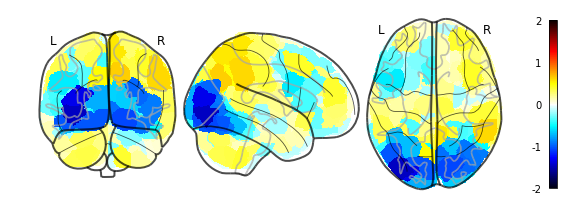

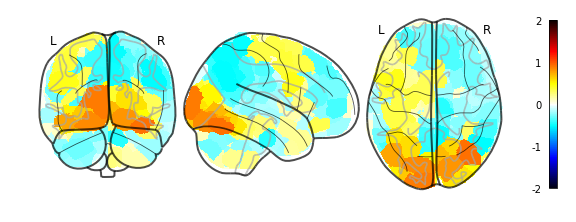

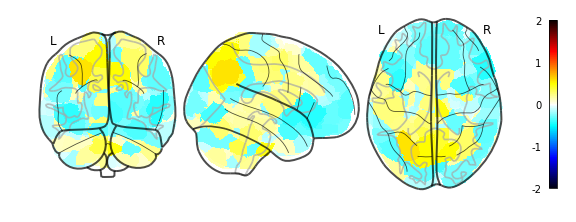

In [63]:
for i_c in range(3):
    img = nib.load(xilin_parc)
    data = img.get_fdata()
    for j_node in range(1,269):
        data[data==j_node] = all_response_ucla[j_node-1][i_c]+500

    data[data<=268] = 0
    data[data>0] -= 500

    array_img = nib.Nifti1Image(data, img.affine)
    nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False, vmin=-2, vmax=2)


# HCP 

In [52]:
file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/hcp/all_response_task.mat')
all_response_hcp = file['all_response']

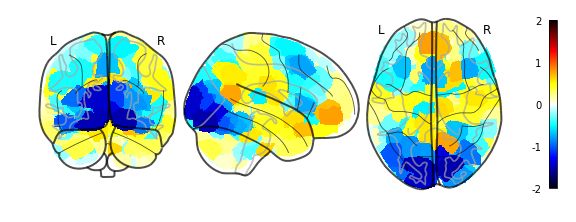

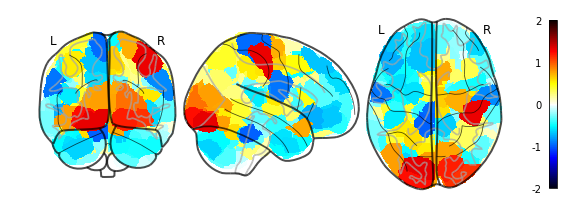

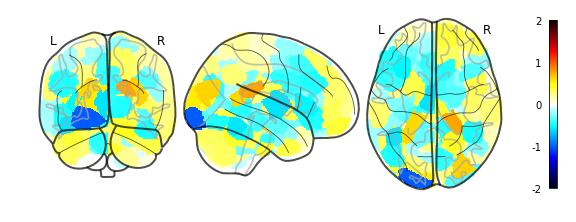

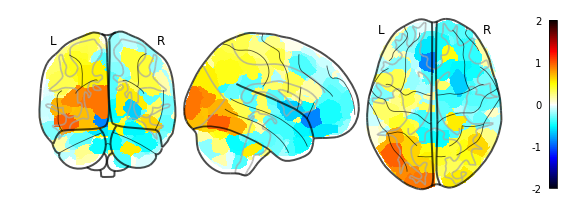

In [50]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for i_c in range(4):
    img = nib.load(xilin_parc)
    data = img.get_fdata()
    for j_node in range(1,269):
        data[data==j_node] = all_response_hcp[j_node-1][i_c]+500

    data[data<=268] = 0
    data[data>0] -= 500

    array_img = nib.Nifti1Image(data, img.affine)
    nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False, vmin=-2, vmax=2)


# Correlation

In [64]:
corr = np.corrcoef(all_response_hcp.T, all_response_ucla.T)
corr[:4, 4:]

array([[ 0.5437536 , -0.61745621, -0.11216904],
       [-0.30658167,  0.33261979,  0.15244041],
       [ 0.07066336, -0.10548502, -0.11174238],
       [-0.47514686,  0.53654723,  0.20794015]])

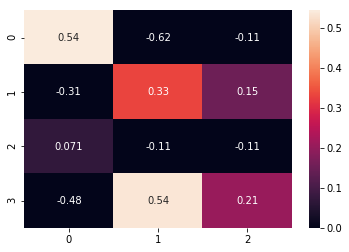

In [65]:
sns.heatmap(corr[:4, 4:], vmin=0, annot=True)

# UCLA Rest and Task 

In [24]:
file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/extension_response.mat')
# file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/ucla/all_response_10nn.mat')
avg_rest_response = file['avg_rest_response']
avg_task_response = file['avg_task_response']

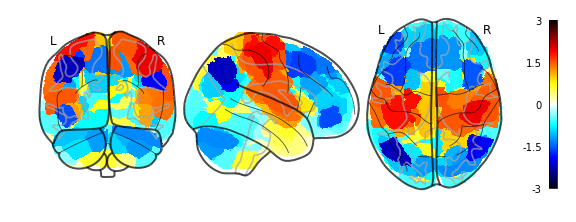

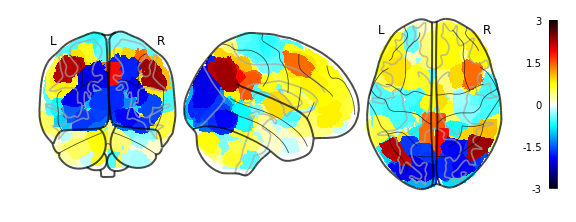

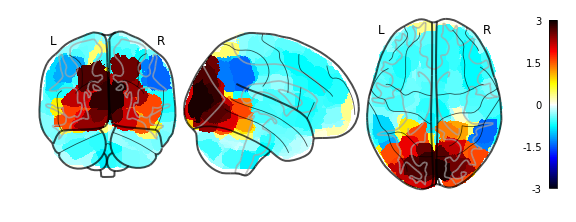

In [13]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for i_c in range(3):
    img = nib.load(xilin_parc)
    data = img.get_fdata()
    for j_node in range(1,269):
        data[data==j_node] = avg_rest_response[j_node-1][i_c]+500

    data[data<=268] = 0
    data[data>0] -= 500

    array_img = nib.Nifti1Image(data, img.affine)
    nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False, vmin=-3, vmax=3)

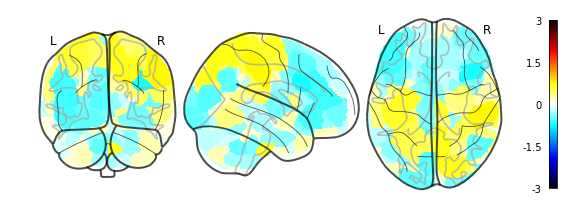

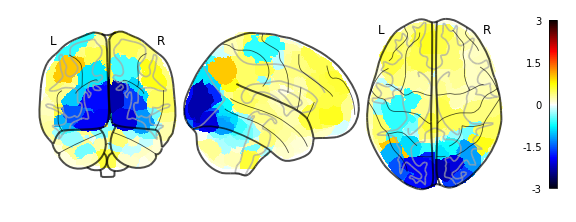

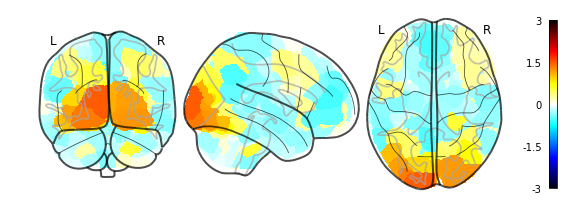

In [12]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for i_c in range(3):
    img = nib.load(xilin_parc)
    data = img.get_fdata()
    for j_node in range(1,269):
        data[data==j_node] = avg_task_response[j_node-1][i_c]+500

    data[data<=268] = 0
    data[data>0] -= 500

    array_img = nib.Nifti1Image(data, img.affine)
    nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False, vmin=-3, vmax=3)

### high cog UCLA

In [25]:
avg_task_response_highcog = file['avg_task_response_highcog']

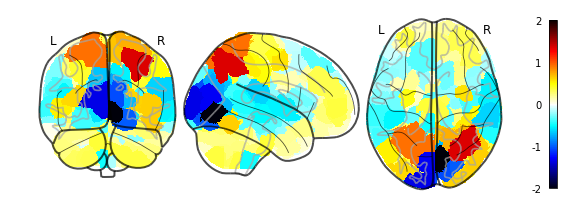

In [27]:
img = nib.load(xilin_parc)
data = img.get_fdata()

img = nib.load(xilin_parc)
data = img.get_fdata()
for j_node in range(1,269):
    data[data==j_node] = avg_task_response_highcog[j_node-1]+500

data[data<=268] = 0
data[data>0] -= 500

array_img = nib.Nifti1Image(data, img.affine)
nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False, vmin=-2, vmax=2)

# Dustin column

In [28]:
file = sio.loadmat('/Users/siyuangao/Working_Space/fmri/code_siyuan/2018summer/2sDM/output/hcp/t.mat')
p2 = file['t']
missing_nodes = np.array([249, 239, 243, 129, 266, 109, 115, 118, 250])-1;

In [29]:
ind = np.ones(268)
ind[missing_nodes] = 0
index = np.where(ind==1)
p = np.zeros((268, 4))
for i in range(4):
    p[index, i] = p2[:, i]

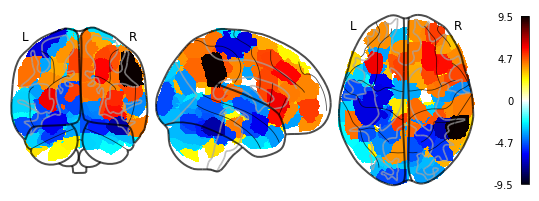

In [30]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for j_node in range(1,269):
    data[data==j_node] = p[j_node-1, 0]+500

data[data<=268] = 0
data[data>0] -= 500

array_img = nib.Nifti1Image(data, img.affine)
nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False)

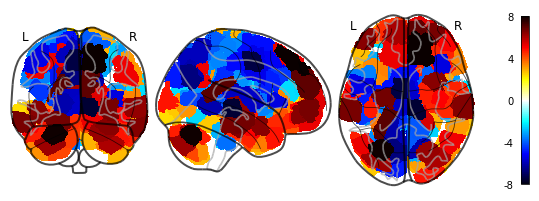

In [31]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for j_node in range(1,269):
    data[data==j_node] = p[j_node-1, 1]+500

data[data<=268] = 0
data[data>0] -= 500

array_img = nib.Nifti1Image(data, img.affine)
nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False)

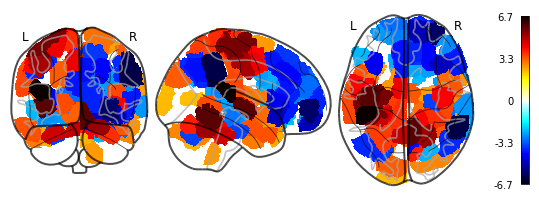

In [32]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for j_node in range(1,269):
    data[data==j_node] = p[j_node-1, 2]+500

data[data<=268] = 0
data[data>0] -= 500

array_img = nib.Nifti1Image(data, img.affine)
nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False)

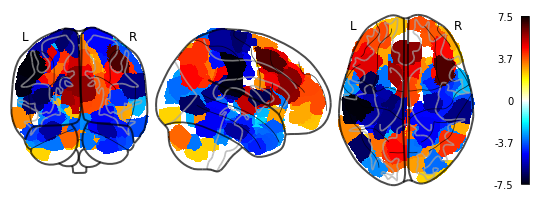

In [33]:
img = nib.load(xilin_parc)
data = img.get_fdata()
for j_node in range(1,269):
    data[data==j_node] = p[j_node-1, 3]+500

data[data<=268] = 0
data[data>0] -= 500

array_img = nib.Nifti1Image(data, img.affine)
nilearn.plotting.plot_glass_brain(array_img, colorbar=True,  plot_abs=False)